<a href="https://colab.research.google.com/github/zhreyaa/software-systems/blob/main/Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MT2023179 SHREYA CHAVAN

Question 3 K-Means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_link = "/content/football.csv"
data = pd.read_csv(path_link)
data.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


Finding the optimal value of k using the elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

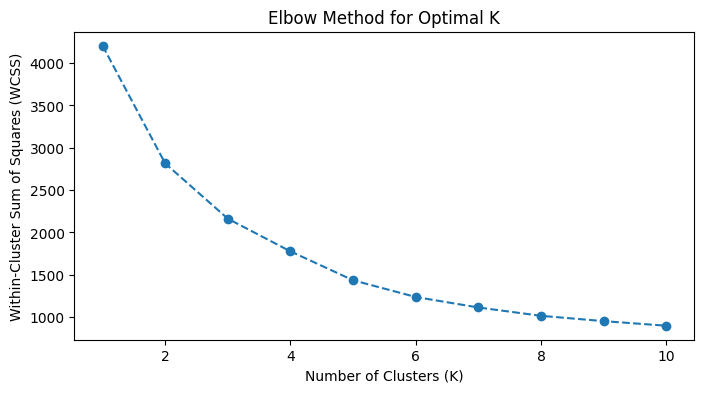

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Group by club and calculate the mean for relevant features
club_data = data.groupby('club_team_id')[['overall',	'potential',	'value_eur',	'wage_eur',	'age','club_jersey_number']].mean()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(club_data)

# Determine the optimal number of clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

players = pd.read_csv("/content/football.csv")
features = ["overall", "potential", "wage_eur", "value_eur", "age","club_jersey_number"]
players = players.dropna(subset=features)
data = players[features].copy()
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()


,overall,potential,wage_eur,value_eur,age,club_jersey_number
count,7706.000000,7706.000000,7706.000000,7706.000000,7706.000000,7706.000000
mean,5.635407,5.540772,1.332166,1.223306,4.755465,2.584744
std,1.324443,1.448782,0.707421,0.540159,1.655396,1.578903
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.777778,4.571429,1.042918,1.036087,3.307692,1.510204
50%,5.444444,5.523810,1.100143,1.070885,4.846154,2.224490
75%,6.333333,6.476190,1.329041,1.153370,6.000000,3.142857
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [ ]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,5.444444,5.000000,6.777778,5.222222,8.777778
potential,6.000000,6.952381,4.809524,4.333333,5.523810
wage_eur,1.185980,1.157368,2.416309,1.128755,1.672389
value_eur,1.006444,1.060575,1.034798,1.036087,1.106973
age,4.076923,5.230769,6.384615,5.615385,4.846154
club_jersey_number,1.816327,3.244898,1.102041,1.918367,1.816327


In [ ]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
labels = get_labels(data, centroids)
labels.value_counts()

0    2932
3    2604
1     864
2     657
4     649
dtype: int64

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

The final clustering process

For k = 4

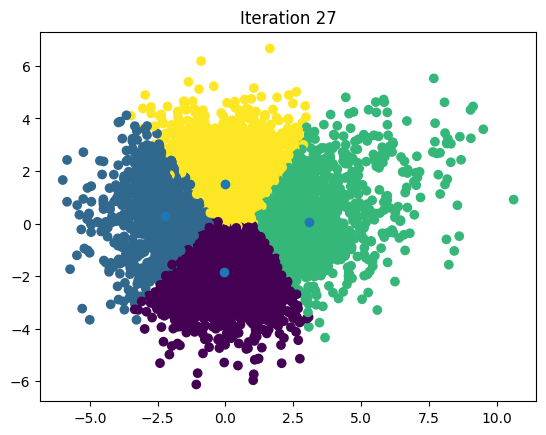

In [ ]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

For k = 3

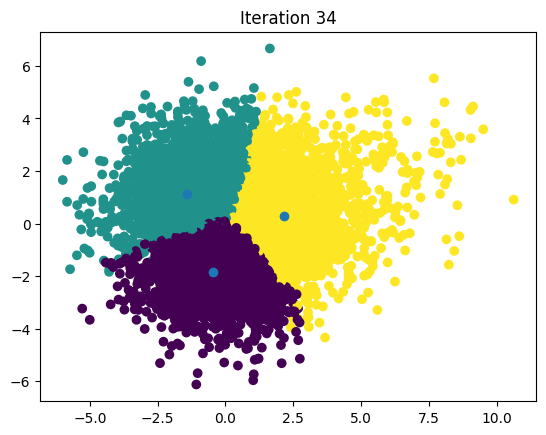

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1